CUSTOMER SEGMENTATION CODE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [ ]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
# Aggregate transaction data
customer_features = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])


In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Compute DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9119814943243767


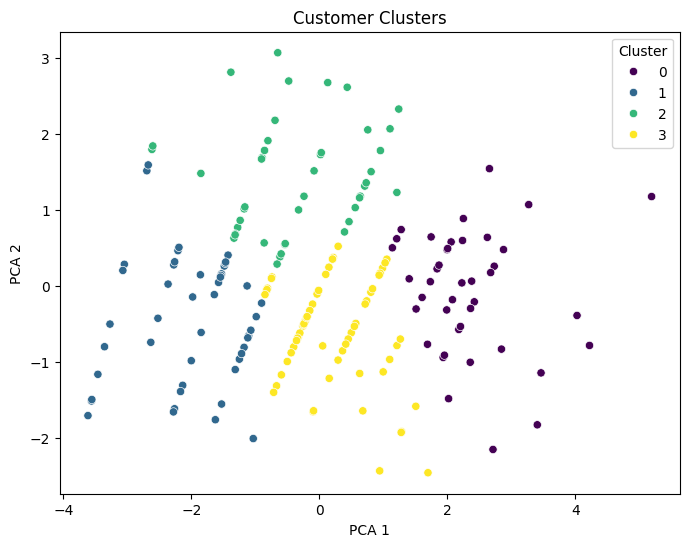

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()